In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as mt
from sklearn.preprocessing import MinMaxScaler as mms
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

data_raw = pd.read_csv("dadosTrain.csv")
data_over = pd.read_csv("oversample_data.csv")
data_under = pd.read_csv("undersample_data.csv")
data_smote = pd.read_csv("smote_data.csv")
data_test = pd.read_csv("dadosTest.csv")

atributes = ['unix_time','amt', 'gender', 'sec', 'faixascategory', 'faixasjob', 'faixascity', 'distGeo']

# DATA TRAIN

In [8]:
X = data_raw[atributes]
Y = data_raw["is_fraud"]
X_test = data_test[atributes]
Y_test = data_test['is_fraud']

scaler = mms().fit(X)

X_train = scaler.transform(X)
X_test = scaler.transform(X_test)
Y_train = Y
Y_test = data_test['is_fraud']

lr = LogisticRegression(random_state = 42)
param_grid = { 
    'solver': ['liblinear','saga'],
    'penalty': ['l1','l2'], 
    'C': [0.001,0.01,0.1,1,10,100,1000],
}
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=2)
CV_lr.fit(X_train, Y_train)

CV_lr.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.26      0.00      0.01      2010

    accuracy                           1.00    555584
   macro avg       0.63      0.50      0.50    555584
weighted avg       0.99      1.00      0.99    555584


Confusion Matrix :
 [[553557     17]
 [  2004      6]]

Acuracia: 0.9963623862458242

ROC AUC: 0.5574075451125042 



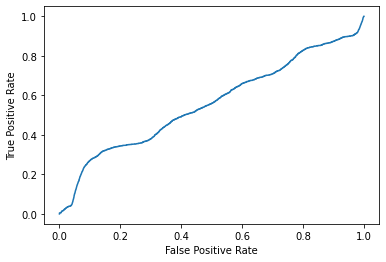

In [9]:
lr = LogisticRegression(random_state=42, penalty= "l1", C= 0.01, solver = 'saga')
lr = lr.fit(X_train, Y_train)

Y_predict = lr.predict(X_test)

print('Classification metrics: \n', mt.classification_report(Y_test,Y_predict))
print('\nConfusion Matrix :\n', mt.confusion_matrix(Y_test, Y_predict))
print('\nAcuracia:', mt.accuracy_score(Y_test, Y_predict))

Y_predict_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = mt.roc_curve(Y_test, Y_predict_proba)
print('\nROC AUC:', mt.roc_auc_score(Y_test, Y_predict_proba),'\n')

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# OVERSAMPLE

In [6]:
X = data_over[atributes]
Y = data_over["is_fraud"]
X_test = data_test[atributes]
Y_test = data_test['is_fraud']

scaler = mms().fit(X)

X_train = scaler.transform(X)
X_test = scaler.transform(X_test)
Y_train = Y
Y_test = data_test['is_fraud']

lr = LogisticRegression(random_state = 42)
param_grid = { 
    'solver': ['liblinear','saga'],
    'penalty': ['l1','l2'], 
    'C': [0.001,0.01,0.1,1,10,100,1000],
}
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=2)
CV_lr.fit(X_train, Y_train)

CV_lr.best_params_

{'C': 1000, 'penalty': 'l1', 'solver': 'liblinear'}

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.03      0.52      0.06      2010

    accuracy                           0.94    555584
   macro avg       0.51      0.73      0.51    555584
weighted avg       0.99      0.94      0.97    555584


Confusion Matrix :
 [[521651  31923]
 [   967   1043]]

Acuracia: 0.9408010309872135

ROC AUC: 0.757396808009435 



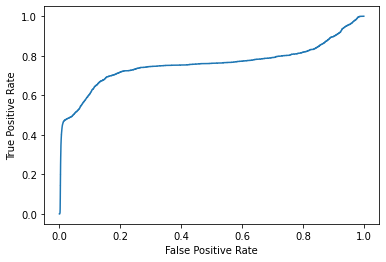

In [7]:
lr = LogisticRegression(random_state=42, penalty= "l1", C= 1000, solver = 'liblinear')
lr = lr.fit(X_train, Y_train)

Y_predict = lr.predict(X_test)

print('Classification metrics: \n', mt.classification_report(Y_test,Y_predict))
print('\nConfusion Matrix :\n', mt.confusion_matrix(Y_test, Y_predict))
print('\nAcuracia:', mt.accuracy_score(Y_test, Y_predict))

Y_predict_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = mt.roc_curve(Y_test, Y_predict_proba)
print('\nROC AUC:', mt.roc_auc_score(Y_test, Y_predict_proba),'\n')

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# UNDERSAMPLE

In [4]:
X = data_under[atributes]
Y = data_under["is_fraud"]
X_test = data_test[atributes]
Y_test = data_test['is_fraud']

scaler = mms().fit(X)

X_train = scaler.transform(X)
X_test = scaler.transform(X_test)
Y_train = Y
Y_test = data_test['is_fraud']

lr = LogisticRegression(random_state = 42)
param_grid = { 
    'solver': ['liblinear','saga'],
    'penalty': ['l1','l2'], 
    'C': [0.001,0.01,0.1,1,10,100,1000],
}
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=2)
CV_lr.fit(X_train, Y_train)

CV_lr.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.03      0.52      0.06      2010

    accuracy                           0.94    555584
   macro avg       0.52      0.73      0.52    555584
weighted avg       0.99      0.94      0.97    555584


Confusion Matrix :
 [[522709  30865]
 [   973   1037]]

Acuracia: 0.9426945340398571

ROC AUC: 0.7583487559546794 



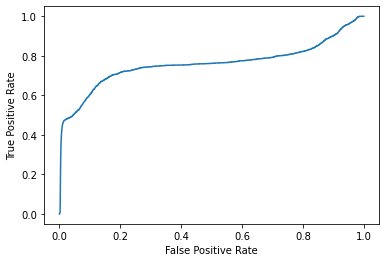

In [5]:
lr = LogisticRegression(random_state=42, penalty= "l1", C= 10, solver = 'liblinear')
lr = lr.fit(X_train, Y_train)

Y_predict = lr.predict(X_test)

print('Classification metrics: \n', mt.classification_report(Y_test,Y_predict))
print('\nConfusion Matrix :\n', mt.confusion_matrix(Y_test, Y_predict))
print('\nAcuracia:', mt.accuracy_score(Y_test, Y_predict))

Y_predict_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = mt.roc_curve(Y_test, Y_predict_proba)
print('\nROC AUC:', mt.roc_auc_score(Y_test, Y_predict_proba),'\n')

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SMOTE

In [2]:
X = data_smote[atributes]
Y = data_smote["is_fraud"]
X_test = data_test[atributes]
Y_test = data_test['is_fraud']

scaler = mms().fit(X)

X_train = scaler.transform(X)
X_test = scaler.transform(X_test)
Y_train = Y
Y_test = data_test['is_fraud']

lr = LogisticRegression(random_state = 42)
param_grid = { 
    'solver': ['liblinear','saga'],
    'penalty': ['l1','l2'], 
    'C': [0.001,0.01,0.1,1,10,100,1000],
}
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=2)
CV_lr.fit(X_train, Y_train)

CV_lr.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'saga'}

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.98    553574
           1       0.05      0.60      0.09      2010

    accuracy                           0.95    555584
   macro avg       0.52      0.78      0.53    555584
weighted avg       1.00      0.95      0.97    555584


Confusion Matrix :
 [[528501  25073]
 [   806   1204]]

Acuracia: 0.9534201848865338

ROC AUC: 0.7938305191733998 



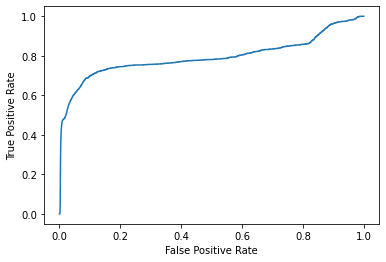

In [3]:
lr = LogisticRegression(random_state=42, penalty= "l1", C= 100, solver = 'saga')
lr = lr.fit(X_train, Y_train)

Y_predict = lr.predict(X_test)

print('Classification metrics: \n', mt.classification_report(Y_test,Y_predict))
print('\nConfusion Matrix :\n', mt.confusion_matrix(Y_test, Y_predict))
print('\nAcuracia:', mt.accuracy_score(Y_test, Y_predict))

Y_predict_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = mt.roc_curve(Y_test, Y_predict_proba)
print('\nROC AUC:', mt.roc_auc_score(Y_test, Y_predict_proba),'\n')

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()